# Regressão de Lasso

Aplicação da regressão de Lasso num dataset real sobre o consumo de combustível em diferentes carros de fabricantes diferentes

Importanto bibliotecas para leitura e manipulação do dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Realizando a leitura do dataset com a biblioteca Pandas

In [2]:
dados = pd.read_csv('Regresao_Lasso_Ridge.csv')

Exibindo cinco primeiras linhas

In [3]:
dados.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Coluna name possue apenas os nomes dos carros e por este motivo pode ser removida

In [4]:
dados = dados.drop('name',axis=1)

Exibindo cinco primeiras linhas do dataset sem a coluna name

In [5]:
dados.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


Exibindo informações sobre cada coluna

In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 24.9+ KB


Coluna horsepower está como tipo objeto e precisa ser convertida para outra classe

In [7]:
dados['horsepower'] = pd.to_numeric(dados['horsepower'], errors='coerce')

Verificando novamente as informações das colunas

In [8]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 24.9 KB


Verificando se existem colunas que possuem valores do tipo Not a Number (NaN)

In [9]:
print(dados.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
dtype: int64


Coluna horsepower possui 5 valores NaNs. Estes valores podem ser removidos, pois a quantidade deles é bem menor do que a amostra total

In [10]:
dados = dados.dropna()

Verificando novamente a existência de NaNs

In [11]:
print(dados.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
dtype: int64


Determinando os valores máximos de cada coluna

In [12]:
dados.max()

mpg               46.6
cylinders          8.0
displacement     455.0
horsepower       230.0
weight          5140.0
acceleration      24.8
year              82.0
origin             3.0
dtype: float64

Determinando os valores mínimos de cada coluna

In [13]:
dados.min()

mpg                9.0
cylinders          3.0
displacement      68.0
horsepower        46.0
weight          1613.0
acceleration       8.0
year              70.0
origin             1.0
dtype: float64

Observamos que os valores de cada coluna tem uma variação muito grande. Para que os modelos de machine learning tenham uma melhor eficiência, recomenda-se normaliza-los. A valor do consumo não deverá ser normalizado devido ser o valor alvo do problema

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
normalizador = StandardScaler()

In [16]:
dados[['cylinders', 'displacement', 'horsepower','weight', 'acceleration', 'year', \
     'origin']] = normalizador.fit_transform(dados[['cylinders','displacement','horsepower',\
                                                  'weight','acceleration','year', 'origin']])

Exibindo cinco primeiros valores para verificar o processo de normalização

In [17]:
dados.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.716641
1,15.0,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-0.716641
2,18.0,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.716641
3,16.0,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.716641
4,17.0,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.716641


Determinando as variáveis X e Y

In [18]:
X = dados.drop('mpg',axis=1).values
Y = dados['mpg'].values

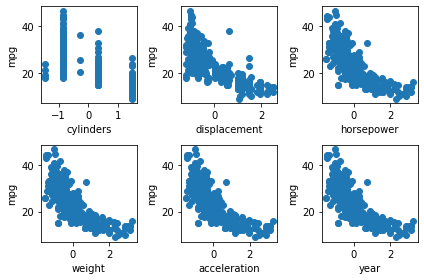

In [19]:
fig, ax = plt.subplots(2, 3)
ax[0,0].scatter(X[:,0],Y);
ax[0,0].set_xlabel('cylinders');
ax[0,0].set_ylabel('mpg');

ax[0,1].scatter(X[:,1],Y);
ax[0,1].set_xlabel('displacement');
ax[0,1].set_ylabel('mpg');

ax[0,2].scatter(X[:,2],Y);
ax[0,2].set_xlabel('horsepower');
ax[0,2].set_ylabel('mpg');

ax[1,0].scatter(X[:,2],Y);
ax[1,0].set_xlabel('weight');
ax[1,0].set_ylabel('mpg');

ax[1,1].scatter(X[:,2],Y);
ax[1,1].set_xlabel('acceleration');
ax[1,1].set_ylabel('mpg');

ax[1,2].scatter(X[:,2],Y);
ax[1,2].set_xlabel('year');
ax[1,2].set_ylabel('mpg');

plt.tight_layout();

Aplicando regressão de Lasso

In [20]:
from sklearn.linear_model import Lasso

Aplicando inicialmente com coeficiente alpha=0.5

In [21]:
modelo1 = Lasso(alpha=0.5)
modelo1.fit(X, Y)

Lasso(alpha=0.5)

In [22]:
score = modelo1.score(X, Y)

In [23]:
score

0.8106452902609764

Determinando o score com diferentes lambdas

In [24]:
lambdas = [0.0001,0.001, 0.01, 0.1, 0.5, 1]

In [25]:
scores = []

In [26]:
for i in range(len(lambdas)):
    modelo = Lasso(alpha=lambdas[i])
    modelo.fit(X, Y)
    score = modelo.score(X, Y)
    scores.append(score)

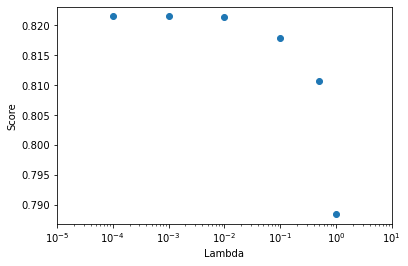

In [27]:
plt.scatter(lambdas,scores);
plt.xlabel('Lambda');
plt.ylabel('Score');
plt.xscale('log');
plt.xlim([1e-5,10]);

Modelo com lambda=0.01 apresentou melhor score

In [28]:
modelo_final = Lasso(alpha=0.01)
modelo_final.fit(X, Y)

Lasso(alpha=0.01)

In [29]:
Y_pred = modelo_final.predict(X)

Comparando previsões com os valores reais

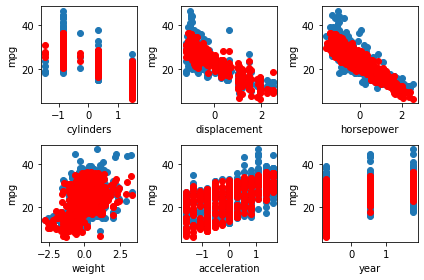

In [30]:
fig, ax = plt.subplots(2, 3)
ax[0,0].scatter(X[:,0],Y);
ax[0,0].scatter(X[:,0],Y_pred,color='red');
ax[0,0].set_xlabel('cylinders');
ax[0,0].set_ylabel('mpg');

ax[0,1].scatter(X[:,1],Y);
ax[0,1].scatter(X[:,1],Y_pred,color='red');
ax[0,1].set_xlabel('displacement');
ax[0,1].set_ylabel('mpg');

ax[0,2].scatter(X[:,3],Y);
ax[0,2].scatter(X[:,3],Y_pred,color='red');
ax[0,2].set_xlabel('horsepower');
ax[0,2].set_ylabel('mpg');

ax[1,0].scatter(X[:,4],Y);
ax[1,0].scatter(X[:,4],Y_pred,color='red');
ax[1,0].set_xlabel('weight');
ax[1,0].set_ylabel('mpg');

ax[1,1].scatter(X[:,5],Y);
ax[1,1].scatter(X[:,5],Y_pred,color='red');
ax[1,1].set_xlabel('acceleration');
ax[1,1].set_ylabel('mpg');

ax[1,2].scatter(X[:,6],Y);
ax[1,2].scatter(X[:,6],Y_pred,color='red');
ax[1,2].set_xlabel('year');
ax[1,2].set_ylabel('mpg');

plt.tight_layout();